In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import astropy.io.fits as fits
import matplotlib.pyplot as plt

In [2]:
def loadData(filename):
    tchfits = fits.open(filename)
    tgas = tchfits[1].data
    return tgas

In [3]:
def drawHRdiagram(Teff,MK):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim([8500,3600])
    ax.set_ylim([10,-10])
    ax.plot(tgas.teff,tgas.MK_tgas,"k.")
    plt.xlabel(r'$T_{\rm eff}$')
    plt.ylabel(r'$M_K$')
    plt.savefig("HRdiagram.png")

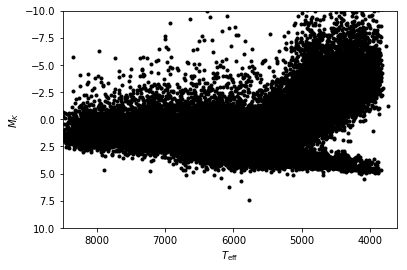

In [10]:
filename = 'LAMOST_TGAS_astrostat_demo.fits'
tgas = loadData(filename)
drawHRdiagram(tgas.teff,tgas.MK_tgas)

              

Text(0.5,1,'Marginal Probability of teff')

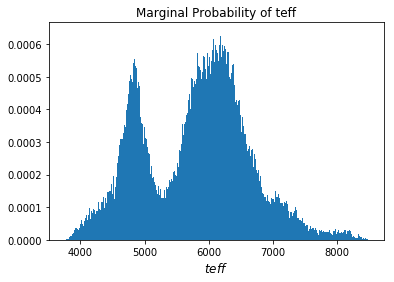

In [5]:
filename = 'LAMOST_TGAS_astrostat_demo.fits'
tgas = loadData(filename)

fig = plt.figure()
ax = fig.add_subplot(111)
new1 = tgas.teff[~np.isnan(tgas.teff)]
ax.hist(new1,1000,normed=1)
ax.set_xlabel(r'$teff$',fontsize=12)
ax.set_title(r"Marginal Probability of teff")
#plt.savefig("温度边缘分布.png")
#fig.show()

/Users/sun/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


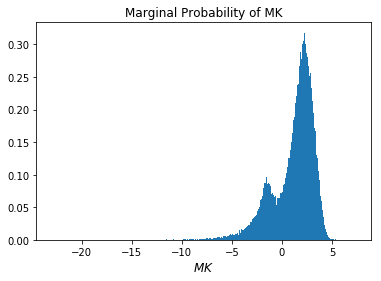

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
new2=tgas.MK_tgas[~np.isnan(tgas.MK_tgas)]
ax.hist(new2,1000,normed=1)
ax.set_xlabel(r"$MK$",fontsize=12)
ax.set_title(r"Marginal Probability of MK")
plt.savefig("MK的边缘密度分布.png")
fig.show()

/Users/sun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/sun/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


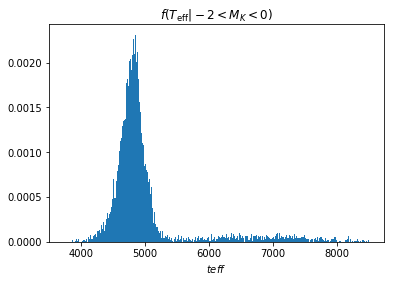

In [14]:
data=tgas[(tgas.teff>0)&(tgas.MK_tgas>-100)]#致谢郭潇同学

data1=data[(data.MK_tgas<0)&(data.MK_tgas>-2)]
plt.figure()
fig, ax = plt.subplots()
ax.hist(data1.teff,1000,normed=1)
ax.set_title(r'$f(T_{\rm eff}|-2<M_K<0)$',fontsize=12)
ax.set_xlabel(r'$teff$')
plt.savefig("f teff的分布")
fig.show()

/Users/sun/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


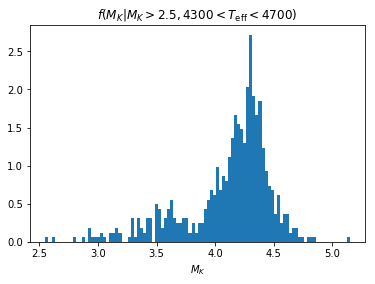

In [8]:
data2=data[(data.MK_tgas>2.5)&(data.teff<4700)&(data.teff>4300)]
fig=plt.figure()
ax = fig.subplots()
ax.hist(data2.MK_tgas,100,normed=1)
ax.set_title(r'$f(M_K|M_K>2.5,4300<T_{\rm eff}<4700)$',fontsize=12)
ax.set_xlabel(r'$M_K$')
plt.savefig("f MK的分布.png")
fig.show()